<a href="https://colab.research.google.com/github/seraffin/FailOmen/blob/master/Pola/Workspace_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import math

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls
!cd '/content/gdrive/My Drive/FailOmen'

gdrive	sample_data


In [0]:
import pandas as pd

#Importing dataset
dataset = pd.read_csv('/content/gdrive/My Drive/FailOmen/dataToML_full3.csv', index_col=False)

In [0]:
x = dataset.iloc[:, 0:23739].values
y = dataset.iloc[:, 23739:24281].values

In [7]:
failCount = 0
passCount = 0
failBuildCount = 0

for a in y:
  if a[np.argmin(a)] == 0 : failBuildCount += 1
  for b in a:
    if b == 0 : failCount += 1
    if b == 1 : passCount += 1
print (failBuildCount)
print (failCount)
print (passCount)
print (failCount / passCount * 100, '%', sep='')

1266
2008
4396322
0.04567454340241684%


## **UTILITIES:**


---

In [0]:
def count_distribution(prediction):
  #Distributions of argmins through all the predictions
  i = 1
  tab = [0] * 542
  for a in prediction:
    j = 0
    for b in a:
      if b < 1.0 : j = j + 1

    #print (i, '. ', j, np.argmin(a))
    tab[np.argmin(a)] += 1
    i = i + 1

  i = 0
  number_of_tests =  542
  distributed_array = [0 for iterator in range(number_of_tests)]
  for a in tab:
    if a > 0 : 
      pass
#       print ('position', i, '\targmin count', a)
      distributed_array[i] = a
    i += 1
#   print (i)
  create_plot(range(len(distributed_array)), distributed_array)  
  return distributed_array


In [0]:
def create_plot(x_data, y_data=0):
  import matplotlib.pyplot as plt
  if y_data == 0:  
    unzip = list(zip(*x_data))
    x_data, y_data = unzip[0],unzip[1]
    print (x_data)
    print ("\n", y_data)
  
  plt.bar(x_data, y_data, align='center', alpha=1, width = 3)
  plt.xlabel("test no")
  plt.ylabel("how many times test was predicted as probably failed")
  plt.show()

uwaga, w funkcji ponizej searchForFailed(), w wyborze dodania spassowanych testow do trainig/testing set-a, mino ze podajemy dokladny procent z spassowanych danych jaki chcemy wykorzysatc, procet ten moze sie roznic w rzeczywistosci. Spowodowane jest to warunkiem modulo, np 20% bedzie 20%, 90% bedzie 100% 

 

In [0]:
def searchForFailed(yList, percent_of_passed_data=20, withpassed_data=False): 
  changedRowList = []
  period_counter_for_passedData = 0
  for row in range (len(yList)):
    if 0 in yList[row]:
      changedRowList.append(row)
      continue
    elif withpassed_data == True:
      try:
        modulo_arg = int(1/(percent_of_passed_data/100))
      except:
        withpassed_data = False
        continue
      if not (period_counter_for_passedData%modulo_arg):
        changedRowList.append(row)
    period_counter_for_passedData += 1
      
  return changedRowList

def returnFailedData(xList, yList, changedRowList):
  xFailed = []
  yFailed = []
  
  for row in changedRowList:
    xFailed.append(xList[row])
    yFailed.append(yList[row])
  xFailed = np.array(xFailed)
  yFailed = np.array(yFailed)
  return xFailed, yFailed

In [0]:
def failsCount():
  fala = 0
  for i, a in enumerate(yTest):
    j = 0
    for k, b in enumerate(a):
      if b < 1.0 : j += 1

    if j > 0 : 
      print (i, '. ', j)
    i = i + 1
    fala += j
  print (fala)

In [0]:
# Evaluation function

def evaluation(predictions,additionalPredictions, refYsupervisor):
  
  lenght = len(refYsupervisor)

  failPositions = [[] for y in range(lenght)]

  for i, a in enumerate(refYsupervisor):

    for j, b in enumerate(a):
      if b == 0 : failPositions[i].append(j);#spisuje w listach(per commit) pozycje, gdzie sfailowal test [3,78,90, itp]

  predictionsTemp = predictions.copy()#tablica list, w ktotej sa przedstawione prawd wystapienia danej labeliki
  # todo 
  #prediction_real byl juz listo po powrotnym mapowaniu, zlozona z testow (czyli ich indeksami 1-542)do sailowania , od najbardziej prawdopodobnych do najmniej 
  
  
#   print(predictionsTemp) 
#   print(type(predictionsTemp))
#   print(len(predictionsTemp))
#   print(predictionsTemp[0])
#   print(predictionsTemp[0][0])
  predictionPositions = [[] for y in range(lenght)]


  for i, commit in enumerate(predictionsTemp):

    if len(failPositions[i]) != 0:#jezeli w danym commicie byl wh jakis blad
      for j in range(len(failPositions[i]) + additionalPredictions):#tyle razy co sfailowanych testow + dodatkowe, przez nas zdefiniowane
        argmin = np.argmin(commit)# argmin = jest indeksem najmniejsza wartoscia dla predykcji sieci , czyt. indexem najbardziej prawdopodobnej
        predictionPositions[i].append(argmin)#umiesc index tej  najbardziej prawdopodobna wartosc, w tab dla danego komitu 
        predictionsTemp[i][argmin] = 1#nie berz pod uwage juz tej wartosci

  predictionHits = [[] for y in range(lenght)]

  for i, a in enumerate(failPositions):
    count = 0
    for j, b in enumerate(a):


      for c in predictionPositions[i]:
  #      predictionHits[i].append(predictions[i][c].copy())
  #      print(predictions[i][c])
  #      print(predictions[i][c])
  #      print (b, c)
        if c == b : count += 1

    if len(failPositions) != 0:
      predictionHits[i].insert(0,count)


  failsCount = 0
  hitsCount = 0
  for i, a in enumerate(refYsupervisor):
    j = 0

    for k, b in enumerate(a):
      if b < 1.0 : j += 1

  #  if j > 0 :
  #    print (i, '.', j, predictionHits[i])


    failsCount += j
    hitsCount += predictionHits[i][0]

  print('Percentage of fails predicted', hitsCount / failsCount * 100, '%')

In [0]:
def listSingleMemberClassesPositions(refY, printFlag):

  yList = refY.tolist()
  print (len(yList))
  yDistinct = [ele for ind, ele in enumerate(yList) if ele not in yList[:ind]]

  classesPopulation = []
  singleMemberClassesPositions = []
  noSingleMemberClasses = 0

  for i, a in enumerate(yDistinct):
    population = 0
    memberPosition = 0
    for j, b in enumerate(yList):
      if a == b: 
        population += 1
        memberPosition = j

    classesPopulation.append(population)
  #  print(i, population)
    if population == 1: 
      noSingleMemberClasses += 1
      singleMemberClassesPositions.append(memberPosition)

  if printFlag == True: 
    print(noSingleMemberClasses)
  else:
    return singleMemberClassesPositions
  




---



---



---



## **PREPARE DATA**

**(optional) create only 'failed data'**

In [0]:
import numpy
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y,percent_of_passed_data=1,withpassed_data=False))


In [0]:
def count_fail_to_pass_ratio(refy):
  failCount = 0
  passCount = 0
  failBuildCount = 0

  for a in y:
    if a[np.argmin(a)] == 0 : failBuildCount += 1
  print ("To training were used data : ")
  print ("failed builds: ", failBuildCount)
  passed_builds = len(refy) - failBuildCount
  print('passed builds: ', passed_builds)
  try:
    print ("failed to passed  ratio: ", failBuildCount / passed_builds * 100, '%', sep='')
  except :
    print ("only failed data")
  
  
# count_fail_to_pass_ratio(yReduced)
  

  
  



---



---



---



## PREPARE MODEL

In [16]:
from sklearn import cross_validation, grid_search
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import svm

import numpy
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y,percent_of_passed_data=0,withpassed_data=False))# bez danych spassowanych

#################################-- MAPOWANIE MACIERZY NA WEKTOR --#################################################################
#select real classes
yReduced_temp = yReduced.tolist()
real_classes = [(ele) for ind, ele in enumerate(yReduced_temp) if ele not in yReduced_temp[:ind]]#takie klasy mozna wyroznic z supervisora dla danych testowych np [1,0,0,0,1....] inna klasa jest [0,0,0,1,0,1...] itp. 


# create svm_labels
svm_labels = []
for i in range(542):
  svm_labels.append(float(i))#tworzenie labelek do svm, narazie nie polaczonych z prawdziwymi danymi

# create mapper
class_mapper = [tuple((real_class, svm_labels[i])) for i, real_class in enumerate(real_classes)]#mapper ktory przypozadkowuje prawdziwym klasom klasy svm np klasa [1,0,0,0,1....] dostaje klase svm 0, itd.


# create new supervisor  
temp_mapped_supervisor = []  
for real_row in yReduced_temp:
  for mapper_row in class_mapper:
    if real_row == mapper_row[0]:
      temp_mapped_supervisor.append(mapper_row[1])# klasy svm przypisane do wiersz danych tesowych np xReduced[0] ma supervisora = 0,  xReduced[123] ma supervisora = 7
print(temp_mapped_supervisor)      
#map supervisor to numpy.array      
mapped_supervisor=numpy.array([numpy.array(xi) for xi in temp_mapped_supervisor])#przekonvertowanie na numpy array
# print(mapped_supervisor[123])

print("tyle wystapien klasy n w danych treningowych: ",len([ele for ele in mapped_supervisor if ele == 155]))
print ("tyle wierszy w danych treningowych: ", len(mapped_supervisor))
print ("tyle klas znaleziono w danych treningowych: ", len(set(mapped_supervisor)))
####################################################################################################################################
    

# xReduced, yReduced = returnFailedData(x, y, searchForFailed(y))
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xReduced, mapped_supervisor, test_size = 0.2, random_state=77)
# print(np.shape(xTrain))
# print(np.shape(yTrain))


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[0.0, 1.0, 2.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 10.0, 21.0, 22.0, 4.0, 23.0, 10.0, 24.0, 25.0, 26.0, 20.0, 27.0, 26.0, 28.0, 29.0, 30.0, 10.0, 20.0, 31.0, 32.0, 28.0, 20.0, 20.0, 26.0, 20.0, 33.0, 20.0, 34.0, 35.0, 36.0, 26.0, 37.0, 37.0, 37.0, 38.0, 39.0, 20.0, 40.0, 41.0, 20.0, 42.0, 31.0, 43.0, 44.0, 44.0, 45.0, 5.0, 46.0, 47.0, 47.0, 48.0, 44.0, 49.0, 50.0, 51.0, 52.0, 53.0, 44.0, 44.0, 54.0, 54.0, 5.0, 54.0, 55.0, 56.0, 57.0, 58.0, 58.0, 58.0, 24.0, 58.0, 24.0, 59.0, 60.0, 61.0, 4.0, 62.0, 63.0, 64.0, 65.0, 63.0, 66.0, 67.0, 68.0, 69.0, 67.0, 70.0, 71.0, 72.0, 72.0, 73.0, 58.0, 58.0, 58.0, 74.0, 75.0, 76.0, 77.0, 78.0, 30.0, 79.0, 61.0, 80.0, 4.0, 62.0, 81.0, 60.0, 62.0, 60.0, 9.0, 4.0, 24.0, 82.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 62.0, 25.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 9.0, 96.0, 97.0, 98.0, 11.0, 17.0, 99.0, 100.0, 20.0, 101.0, 102.0, 0.0, 103.0, 52.0, 104.0, 17.0

In [17]:

# mala gamma  -  odlegle punkty, od potencjalnej garnicy , maja wplyw na ustawienie granicy (decision boundary)  => moze powodobac niedopasownie
# duza gamma -  tylko bliskie punkty, od potencjalnej garnicy , maja wplyw na ustawienie granicy (decision boundary) => moze powodowac overfiting
clf = svm.SVC(gamma=0.01,probability=True)#gamma 0.0001
# clf = svm.SVC(gamma=0.01,probability=False)#gamma 0.0001
clf.fit(xTrain, yTrain) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)



---



---



---



## **TEST MODEL**

In [18]:

predictions = clf.predict(xTest)
# print (predictions[0])
# print(len(predictions))
# print(predictions)
proba_predictions = clf.predict_proba(xTest)
print (proba_predictions)

from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(xTest,  yTest))


[[0.00554241 0.00236676 0.00377186 ... 0.00210588 0.00215068 0.00207619]
 [0.0055192  0.00236735 0.003776   ... 0.00209698 0.00214247 0.0020778 ]
 [0.00564719 0.00237518 0.00378366 ... 0.00216188 0.00221277 0.00209413]
 ...
 [0.00590367 0.0023657  0.0038641  ... 0.00227856 0.00230831 0.00218599]
 [0.00553571 0.00236072 0.00378847 ... 0.00210384 0.00214966 0.00208365]
 [0.00554949 0.00236582 0.00379646 ... 0.00211469 0.00216253 0.00209417]]


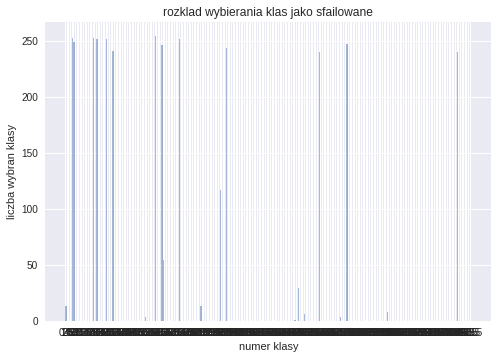

In [19]:
#jakie klasy byly naczesciej(znajdowaly sie w pierwszej 15 najbardziej prawdopodobnych) wybierane
def choose_best_predicted_classes():
  all_row_best_pred = []
  plt_data = [0 for svm_class in svm_labels]
  for prob_prediction in proba_predictions:
    pair_prob_prediction = [(idx, element) for idx, element in enumerate(prob_prediction)]
    sorted_prob_prediction = list(prob_prediction)
    pair_prob_prediction_sorted = sorted(pair_prob_prediction, key=lambda ele: ele[1])
    best_pred = pair_prob_prediction_sorted[-15:]
    all_row_best_pred.append(best_pred)
    for pred_class in best_pred:
      plt_data[pred_class[0]] += 1
  return all_row_best_pred,plt_data 

all_row_best_pred, plt_data = choose_best_predicted_classes()  


# print (plt_data)
bar_width = 1
# widths = [10  for i in range(len(svm_labels))]   
y_pos = range(len(svm_labels))
performance = plt_data
l_y_pos = list(y_pos)
l_y_pos = l_y_pos[:250]
np_y_pos = np.array(l_y_pos)
plt.bar(np_y_pos + bar_width, performance[:250], align='center', alpha=0.5)
plt.xticks(np_y_pos + bar_width / 2)
plt.ylabel('liczba wybran klasy')
plt.xlabel('numer klasy')
plt.title('rozklad wybierania klas jako sfailowane')
plt.show()


  

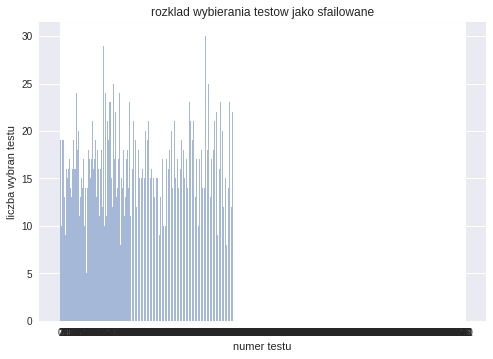

In [20]:
def create_fake_pred(quantity_of_predictions, quantity_oftests_set_as_failed=15):
  import random
  stats =  [0 for i in range(542)]
  random_matrix_pred = []
  for row_no in range(quantity_of_predictions):
      random_pred_list = [1 for i in range(542)]
      random_indexes_list = []
      while (len(random_indexes_list) <  15):
          drawn_index= random.randint(0,230)
          if random.randint(0,230) not in random_indexes_list:
            random_indexes_list.append(drawn_index)
          
      for idx in random_indexes_list:
        stats[idx] = stats[idx] + 1
        
      random_matrix_pred.append(random_indexes_list)
      
  random_matrix_pred = np.array(random_matrix_pred)
  return random_matrix_pred, stats, 

stats = create_fake_pred(len(yTest))[1]
y_pos = range(len(stats))
performance = stats

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.ylabel('liczba wybran testu')
plt.xlabel('numer testu')
plt.title('rozklad wybierania testow jako sfailowane')
plt.show()


In [21]:
#evaluation 

def read_predicted_tests_numbers(best_pred): 
  svm_pred_to_fail = []
  test_counter = 0
  for svm_class in best_pred:
    for ele in class_mapper:
      if svm_class[0] == ele[1]:
        for idx,test in enumerate(ele[0]):
          if test == 0:
            svm_pred_to_fail.append(idx)
            test_counter += 1
            if test_counter > 15:
              return svm_pred_to_fail
  else:
    return svm_pred_to_fail
  
def read_real_tests_numbers(idx, ref_yTest):
  real_class = class_mapper[int(yTest[idx])]
  for pair in class_mapper:
    if pair[1] == ref_yTest[idx]:
      real_vector =  list(pair[0])
  real_failed_tests_numbers = [test_id for test_id, test  in enumerate(real_vector) if test == 0]
  return real_failed_tests_numbers
  
  
def new_evaluation(all_row_best_pred, yTest, is_fake_pred=False):  
  all_performances = []

  for idx, best_pred in enumerate(all_row_best_pred): 
    real_failed_tests_numbers = set(read_real_tests_numbers(idx, yTest))
    if is_fake_pred == True:
      predicted_tests_numbers = set(best_pred)
    else:
      predicted_tests_numbers = set(read_predicted_tests_numbers(best_pred))
    diffrence = real_failed_tests_numbers - predicted_tests_numbers
    try:
      single_perfomance = (1 - (len(diffrence)/len(real_failed_tests_numbers)))
    except ZeroDivisionError:
      print("skip eveluation due to no failed test in class")
      continue
    all_performances.append(single_perfomance)
  return all_performances

  
all_performance = new_evaluation(all_row_best_pred, yTest) 
average_performance = sum(all_performance)/ len(all_performance)
print("============================================================================================")
fake_pred = create_fake_pred(len(yTest))[0]
fake_evaluation = new_evaluation(fake_pred, yTest,is_fake_pred=True)
average_fake_pred = sum(fake_evaluation)/ len(fake_evaluation)

print(average_performance)
print(average_fake_pred)  
  
  
  
          
      

  

0.1615485564304462
0.04330708661417323


In [22]:
def svm_function(gamma_parameter):
  global xTrain, yTrain, xTest, yTest, class_mapper
  clf = svm.SVC(gamma=gamma_parameter,probability=True)#gamma 0.0001
  clf.fit(xTrain, yTrain)

  proba_predictions = clf.predict_proba(xTest)
  
  
  def choose_best_predicted_classes():
    all_row_best_pred = []
    plt_data = [0 for svm_class in svm_labels]
    for prob_prediction in proba_predictions:
      pair_prob_prediction = [(idx, element) for idx, element in enumerate(prob_prediction)]
      sorted_prob_prediction = list(prob_prediction)
      pair_prob_prediction_sorted = sorted(pair_prob_prediction, key=lambda ele: ele[1])
      best_pred = pair_prob_prediction_sorted[-15:]
      all_row_best_pred.append(best_pred)
      for pred_class in best_pred:
        plt_data[pred_class[0]] += 1
    return all_row_best_pred,plt_data 
  
  all_row_best_pred, plt_data = choose_best_predicted_classes()
  
  def read_predicted_tests_numbers(best_pred): 
    svm_pred_to_fail = []
    test_counter = 0
    for svm_class in best_pred:
      for ele in class_mapper:
        if svm_class[0] == ele[1]:
          for idx,test in enumerate(ele[0]):
            if test == 0:
              svm_pred_to_fail.append(idx)
              test_counter += 1
              if test_counter > 15:
                return svm_pred_to_fail
    else:
      return svm_pred_to_fail
  
  def read_real_tests_numbers(idx, ref_yTest):
    real_class = class_mapper[int(yTest[idx])]
    for pair in class_mapper:
      if pair[1] == ref_yTest[idx]:
        real_vector =  list(pair[0])
    real_failed_tests_numbers = [test_id for test_id, test  in enumerate(real_vector) if test == 0]
    return real_failed_tests_numbers


  def new_evaluation(all_row_best_pred, yTest, is_fake_pred=False):  
    all_performances = []
    for idx, best_pred in enumerate(all_row_best_pred): 
      real_failed_tests_numbers = set(read_real_tests_numbers(idx, yTest))
      if is_fake_pred == True:
        predicted_tests_numbers = set(best_pred)
      else:
        predicted_tests_numbers = set(read_predicted_tests_numbers(best_pred))
      diffrence = real_failed_tests_numbers - predicted_tests_numbers
      try:
        single_perfomance = (1 - (len(diffrence)/len(real_failed_tests_numbers)))
      except ZeroDivisionError:
        print("skip eveluation due to no failed test in class")
        continue
      all_performances.append(single_perfomance)
    return all_performances

  
  
  all_performance = new_evaluation(all_row_best_pred, yTest) 
  average_performance = sum(all_performance)/ len(all_performance)
  return average_performance


svm_function(0.01)  
  

  
  

0.1158792650918635

In [0]:
def optimizer(func, steps, minMax1, minMax2=False, split = 4, reduceSplit = False, searchMaximum = True):
  """
  -------------------------------
  Function can take 1 or 2 parameters to optimization.
  Default: 2 parameters (you need to set values for minMax1 and minMax2)
           For 1 parameter optimization set argument: "minMax2 = False"

  -------------------------------
  func        -->  enter your function there
                   IMPORTANT:
                   * if function has 1 parameter:  minMax1 = [min, max],   minMax2 = False
                   * if function has 2 parameters: minMax1 = [min1, max1], minMax2 = [min2, max2]
                   
  steps       -->  number of iterations of recurency
  
  minMax1/2   -->  list of min and max value of parameters to begin with (ex. [min, max])
  
  split        -->  number of parts in which function will split values of parameters
                   higher value -> better accuracy & longer calculation time
                   (Values range 2 -- 10)
                   
  reduceSplit -->  If True: with every repetition of recurency will reduce split by one
  
  -------------------------------
  """
  import matplotlib.pyplot as plt
  import math
  
  
  plotData = []
  iterationCounter = 0
  iterationsLeft = steps
  recurencyCounter = 0
  bestResult = None
  print(iterationsLeft)
  
  #--------------------

  def returnStepList(minValue, maxValue, nrSteps):
      step = math.fabs(maxValue - minValue)/nrSteps
      actualMin = min([minValue, maxValue])
      actualMax = max([minValue, maxValue])
      return [actualMin + step*nr for nr in range(nrSteps + 1)]

  def resetIterators():
    global plotData
    global iterationCounter
    global recurencyCounter
    plotData = []
    iterationCounter = 0
    recurencyCounter = 0


  def create_plot_optimizer(x_data, y_data=0, xLabel = 'X', yLabel = 'Y'):
      import matplotlib.pyplot as plt
      if y_data == 0:  
          unzip = list(zip(*x_data))
          x_data, y_data = unzip[0],unzip[1]
      plt.plot(x_data, y_data)
      plt.xlabel(xLabel)
      plt.ylabel(yLabel)
      plt.show()


  def optimize(func, steps, minMax1, minMax2 = False, split = 4, reduceSplit = False, 
               searchMaximum = True, iLeft = None):
      
      global resetIterators
      global iterationCounter
      global iterationsLeft
      global recurencyCounter
      global bestResult
      
      localICounter = 0
      iL = iLeft
      sMax = searchMaximum
      singleParam = False
      bestPair = [None, None]
      resultList = []
      parametersList=[]

      if reduceSplit is False:
        newSplit = split
      else:
        if split > 2:
          newSplit = split - 1
        else:
          newSplit = 2
      if split > 10:
        raise ValueError("Too big value of 'split' parameter! This would highly increase number of iterations")
      if minMax2 is False:
        singleParam = True

      recurencyCounter += 1

      if isinstance(minMax1, list) and (isinstance(minMax2, list) or singleParam) :

          stepList1 = returnStepList(minMax1[0], minMax1[1], split)
          if singleParam:
            stepList2 = [1]
          else:
            stepList2 = returnStepList(minMax2[0], minMax2[1], split)
          
          nrIterations = len(stepList1)*len(stepList2)
          i1 = 0
          i2 = 0



          for el1 in stepList1:
              i2 = 0
              for el2 in stepList2:
                  iterationCounter += 1
                  localICounter += 1
                 

                  #----function----
                  if singleParam:
                    evaluation = func(el1)
                  else:
                    evaluation = func(el1, el2)
                  #----function----
                  print("---Iteration: {0}/{1} ----Recurency: {2}/{3} ---Evaluation:{4} ---Parameter: {5}".format(localICounter, \
                                                                                                                   nrIterations,\
                                                                                                                   recurencyCounter,\
                                                                                                                   iL,\
                                                                                                                   evaluation,\
                                                                                                                   el1))\

                  if len(resultList) > 0:
                      #----condition----
                      if sMax:
                        if evaluation >= max(resultList):
                            bestPair[0] = i1
                            bestPair[1] = i2
                      else:
                        if evaluation <= min(resultList):
                            bestPair[0] = i1
                            bestPair[1] = i2

                      #----condition----

                  else:
                    if singleParam:
                      bestPair[0] = i1
                    else:
                      bestPair[0] = i1
                      bestPair[1] = i2

                  plotData.append([evaluation, iterationCounter])

                  resultList.append(evaluation)
                  if singleParam:
                    parametersList.append([el1])
                  else:
                    parametersList.append([el1, el2])

                  i2 += 1
              i1 += 1

          #------------------------------------------------


          if bestPair[0] == stepList1.index(stepList1[0]):
              minMax1[0] = stepList1[bestPair[0]]/2
              minMax1[1] = stepList1[bestPair[0] + 1]
  #                 print("best values of PARAM_1 are close to MIN value")

          elif bestPair[0] == stepList1.index(stepList1[-1]):
              minMax1[0] = stepList1[bestPair[0] - 1]
              minMax1[1] = stepList1[bestPair[0]]*2
  #                 print("best values of PARAM_1 are close to MAX value")


          else:
              minMax1[0] = stepList1[bestPair[0] - 1]
              minMax1[1] = stepList1[bestPair[0] + 1]

          #------------------------------------------------
          if not singleParam:
            if bestPair[1] == stepList2.index(stepList2[0]):
                minMax2[0] = stepList1[bestPair[1]]/2
                minMax2[1] = stepList1[bestPair[1] + 1]
  #                 print("best values of PARAM_2 are close to MIN value")

            elif bestPair[1] == stepList2.index(stepList2[-1]):
                minMax2[0] = stepList1[bestPair[1] - 1]
                minMax2[1] = stepList1[bestPair[1]]*2
  #                 print("best values of PARAM_2 are close to MAX value")


            else:
                minMax2[0] = stepList2[bestPair[1] - 1]
                minMax2[1] = stepList2[bestPair[1] + 1]

          #------------------------------------------------
          if sMax:
            result = max(resultList)
            param1 = parametersList[resultList.index(max(resultList))][0]
            if not singleParam:
              param2 = parametersList[resultList.index(max(resultList))][1]
          else:
            result = min(resultList)
            param1 = parametersList[resultList.index(min(resultList))][0]
            if not singleParam:
              param2 = parametersList[resultList.index(min(resultList))][1]
                    
          if steps > 0:
            if singleParam:
              print("---------------------------------------------------------\n")
              optimize(func,
                       steps - 1,
                       [minMax1[0],minMax1[1]],
                       minMax2 = False,
                       split = newSplit,
                       reduceSplit=reduceSplit,
                       searchMaximum = sMax,
                       iLeft = iL )
            else:
              print("---------------------------------------------------------\n")
              optimize(func,
                       steps - 1,
                       [minMax1[0], minMax1[1]],
                       minMax2=[minMax2[0], minMax2[1]],
                       split = newSplit,
                       reduceSplit=reduceSplit,
                       searchMaximum = sMax,
                       iLeft = iL)
            
          else:
            if singleParam:
              print('\n------------------ACHIEVED RESULTS------------------\n')
              print("{:<20}{}\n{:<20}{}\n".format('RESULT: ',
                                                  result,
                                                  'PARAMETER 1: ',
                                                  param1))
              return [result, param1]
            else:
              print('\n------------------ACHIEVED RESULTS------------------\n')
              print("{:<20}{}\n{:<20}{}\n{:<20}{}\n".format('RESULT: ',
                                                            result,
                                                            'PARAMETER 1: ',
                                                            param1,
                                                            'PARAMETER 2: ',
                                                            param2))
              return [result, param1, param2]

      else:
          print("enter correct value!")
         
  resetIterators()
  result = optimize(func,
                    steps,
                    minMax1,
                    minMax2,
                    split,
                    reduceSplit,
                    searchMaximum = searchMaximum,
                    iLeft = steps+1)
  xData = [num[1] for num in plotData]
  yData = [num[0] for num in plotData]
  create_plot_optimizer(xData, yData, 'Iterations', 'Result')
  return result


In [0]:
import math
def exampleFunction(x, y=10):
  return ((-20)* math.exp((((0.5*(x**2 + y**2))**0.5)*(-0.2))))


4
---Iteration: 1/7 ----Recurency: 1/5 ---Evaluation:0.14461942257217847 ---Parameter: 0.1
---Iteration: 2/7 ----Recurency: 1/5 ---Evaluation:0.14527559055118108 ---Parameter: 0.13333333333333333
---Iteration: 3/7 ----Recurency: 1/5 ---Evaluation:0.13543307086614173 ---Parameter: 0.16666666666666669
---Iteration: 4/7 ----Recurency: 1/5 ---Evaluation:0.1433070866141732 ---Parameter: 0.2
---Iteration: 5/7 ----Recurency: 1/5 ---Evaluation:0.15511811023622046 ---Parameter: 0.23333333333333334
---Iteration: 6/7 ----Recurency: 1/5 ---Evaluation:0.12887139107611548 ---Parameter: 0.26666666666666666
---Iteration: 7/7 ----Recurency: 1/5 ---Evaluation:0.14251968503937007 ---Parameter: 0.30000000000000004
---------------------------------------------------------

---Iteration: 1/7 ----Recurency: 2/5 ---Evaluation:0.1426509186351706 ---Parameter: 0.2
---Iteration: 2/7 ----Recurency: 2/5 ---Evaluation:0.12611548556430446 ---Parameter: 0.2111111111111111
---Iteration: 3/7 ----Recurency: 2/5 ---Evalu

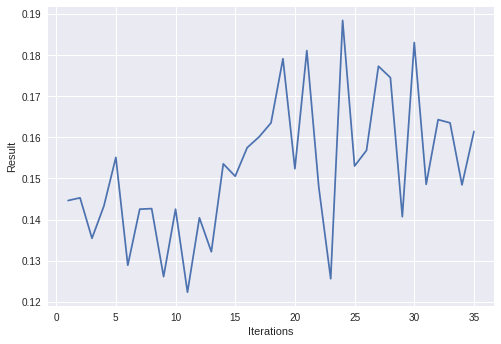

In [25]:
optimizer(svm_function, steps=4, minMax1=[0.1,0.3], minMax2=False, split=6, reduceSplit=False, searchMaximum=True)